<a href="https://colab.research.google.com/github/asimds/gupshup/blob/main/2feb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pylab.rcParams['figure.figsize'] = 12,8
sns.set(rc={'figure.figsize':(15.7,9.27)})
sns.set_style("whitegrid")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df1= pd.read_csv('/content/drive/MyDrive/change/merged_imputed_df (1).csv')

In [4]:
df1.shape

(19791, 234)

In [5]:
df1.head()

,Unnamed: 0,product,bill_counts,buy_gold_counts,cashback_counts,charge_counts,convenience_fee_counts,dnd_fee_counts,emi_counts,emi_processing_fee_counts,giftcard_counts,late_fee_counts,nach_reverse_fee_counts,paytm_counts,qr_counts,sell_gold_counts,shopping_counts,utility_counts,periods_available,bill_amount_max,buy_gold_amount_max,cashback_amount_max,charge_amount_max,convenience_fee_amount_max,dnd_fee_amount_max,emi_amount_max,emi_processing_fee_amount_max,giftcard_amount_max,late_fee_amount_max,nach_reverse_fee_amount_max,paytm_amount_max,qr_amount_max,sell_gold_amount_max,shopping_amount_max,utility_amount_max,bill_amount_total,buy_gold_amount_total,cashback_amount_total,charge_amount_total,convenience_fee_amount_total,...,brand_premium,brand_premium_other,brand_realme,brand_redmi,brand_samsung,brand_vivo,brand_xiaomi,total_brands,carrier_Airtel,carrier_BSNL,carrier_Jio,carrier_Others,carrier_Vodafone,total_carriers,different_os_versions,latest_os_version,different_locales,page_visit_app,page_visit_device,page_visit_documents,page_visit_files,page_visit_giftcards,page_visit_gold,page_visit_home,page_visit_payments,page_visit_qr,page_visit_recharges,page_visit_session,page_visit_shopping,page_visit_subscriptions,page_visit_virtual_cards,total_page_visits,Afternoon_Count,Evening_Count,Morning_Count,Night_Count,different_locations_visited,Max_Movement,Average_Movement,user_id
0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,200.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,200.0,200.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.00000,0.0,1.0,1.0,10.0,1.0,2.0,3.0,1.0,3.0,2.0,0.0,5.0,24.0,0.0,17.0,0.0,7.0,0.0,0.0,64.0,0.0,64.0,0.0,0.0,1.0,0.000000,0.000000,129758
1,1,0.0,5.0,0.0,0.0,0.0,4.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,5.0,829.70,0.0,0.0,0.0,5.9,0.0,110.0,17.70,0.0,0.00,0.0,0.0,20.0,0.0,0.0,48.0,1701.79,0.0,0.0,0.0,23.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,1.0,1.0,1.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,67.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,12.0,0.0,19.0,39.0,3.0,0.063246,0.044567,142137
2,2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,6.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,10.0,7.00,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.25948,0.0,3.0,3.0,12.0,1.0,578.0,207.0,0.0,0.0,90.0,142.0,2002.0,3063.0,0.0,0.0,0.0,883.0,0.0,0.0,1.0,0.0,1360.0,3837.0,0.0,1.0,1.194548,7.277696,324473
3,3,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,10.0,1998.73,0.0,0.0,0.0,0.0,50.0,0.0,0.00,600.0,233.48,0.0,0.0,0.0,0.0,0.0,200.0,7955.29,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.25948,0.0,3.0,3.0,12.0,1.0,578.0,207.0,0.0,0.0,90.0,142.0,2002.0,3063.0,0.0,0.0,0.0,883.0,0.0,0.0,1.0,0.0,1360.0,3837.0,0.0,1.0,1.192714,7.407423,182655
4,4,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,0.00,0.0,0.0,0.0,5.9,0.0,110.0,32.45,0.0,0.00,0.0,0.0,30.0,0.0,0.0,11.0,0.00,0.0,0.0,0.0,11.8,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.25948,0.0,3.0,3.0,12.0,1.0,578.0,207.0,0.0,0.0,90.0,142.0,2002.0,3063.0,0.0,0.0,0.0,883.0,0.0,0.0,1.0,0.0,1360.0,3837.0,0.0,1.0,1.189876,7.245165,585083


In [6]:
cols = list(df1.columns)
cols = [cols[-1]] + cols[:-1]
df1 = df1[cols]

In [7]:
df1.columns

Index(['user_id', 'Unnamed: 0', 'product', 'bill_counts', 'buy_gold_counts',
       'cashback_counts', 'charge_counts', 'convenience_fee_counts',
       'dnd_fee_counts', 'emi_counts',
       ...
       'page_visit_subscriptions', 'page_visit_virtual_cards',
       'total_page_visits', 'Afternoon_Count', 'Evening_Count',
       'Morning_Count', 'Night_Count', 'different_locations_visited',
       'Max_Movement', 'Average_Movement'],
      dtype='object', length=234)

In [8]:
#remove_gupshup=['CIBIL_OVERDUE_Delivered', 'CIBIL_OVERDUE_Operator_Failed',
#       'ISSUE_RESOLVED_Delivered', 'ISSUE_RESOLVED_Operator_Failed',
#       'OTP_Delivered', 'OTP_Not_Sent_to_Operator', 'OTP_Operator_Failed',
#       'OTP_Report_Pending', 'OVERDUE_SETTLEMENT_Delivered',
#       'OVERDUE_SETTLEMENT_Operator_Failed', 'PAYMENT_LINK_Delivered',
#       'PAYMENT_LINK_Operator_Failed', 'REFERENCE_Delivered',
#       'REFERENCE_Not_Sent_to_Operator', 'REFERENCE_Operator_Failed',
#       'REFERENCE_Report_Pending', 'SETTLEMENT_Delivered',
#       'SETTLEMENT_Operator_Failed']

IndentationError: ignored

In [ ]:
#dropping unnecessary columns
#unnecessary = remove_gupshup

#df1.drop(unnecessary,axis=1,inplace=True)

In [9]:
df1.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
df2= pd.read_csv('/content/drive/MyDrive/change/d2.csv')

In [12]:
df2.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
df2.head()

,user_id,rfr_days_mean_before_billable,rfr_days_median_before_billable,rfr_days_msgs_var_before_billable,rfr_days_msgs_max_before_billable,rfr_days_msgs_sum_before_billable,rfr_msg_mean_before_billable,rfr_msg_median_before_billable,rfr_msgs_var_before_billable,rfr_msgs_max_before_billable,rfr_msgs_sum_before_billable,rfr_days_mean_before_dnd,rfr_days_median_before_dnd,rfr_days_var_before_dnd,rfr_days_max_before_dnd,rfr_days_sum_before_dnd,rfr_msg_mean_before_dnd,rfr_msg_before_median_dnd,rfr_msgs_var_before_dnd,rfr_msgs_max_before_dnd,rfr_msgs_sum_before_dnd,rfr_msgs_sent_mean,rfr_msgs_sent_median,rfr_msgs_sent_var,rfr_msgs_sent_max,rfr_msgs_sent_sum,max_bill,sum_bill,max_dnd,sum_dnd,med_dnd,med_bill,day_med_billable,day_med_dnd,Final_Risk
0,1,1.6,1.0,0.8,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,25705,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
2,25767,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3,25802,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
4,25804,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


In [14]:
df2=df2[['user_id','Final_Risk']]

In [15]:
df = pd.merge(df1, df2, on = 'user_id', how='inner')#join

In [16]:
df.shape

(14053, 234)

In [17]:
df.head()

,user_id,product,bill_counts,buy_gold_counts,cashback_counts,charge_counts,convenience_fee_counts,dnd_fee_counts,emi_counts,emi_processing_fee_counts,giftcard_counts,late_fee_counts,nach_reverse_fee_counts,paytm_counts,qr_counts,sell_gold_counts,shopping_counts,utility_counts,periods_available,bill_amount_max,buy_gold_amount_max,cashback_amount_max,charge_amount_max,convenience_fee_amount_max,dnd_fee_amount_max,emi_amount_max,emi_processing_fee_amount_max,giftcard_amount_max,late_fee_amount_max,nach_reverse_fee_amount_max,paytm_amount_max,qr_amount_max,sell_gold_amount_max,shopping_amount_max,utility_amount_max,bill_amount_total,buy_gold_amount_total,cashback_amount_total,charge_amount_total,convenience_fee_amount_total,...,brand_premium,brand_premium_other,brand_realme,brand_redmi,brand_samsung,brand_vivo,brand_xiaomi,total_brands,carrier_Airtel,carrier_BSNL,carrier_Jio,carrier_Others,carrier_Vodafone,total_carriers,different_os_versions,latest_os_version,different_locales,page_visit_app,page_visit_device,page_visit_documents,page_visit_files,page_visit_giftcards,page_visit_gold,page_visit_home,page_visit_payments,page_visit_qr,page_visit_recharges,page_visit_session,page_visit_shopping,page_visit_subscriptions,page_visit_virtual_cards,total_page_visits,Afternoon_Count,Evening_Count,Morning_Count,Night_Count,different_locations_visited,Max_Movement,Average_Movement,Final_Risk
0,129758,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,200.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,200.0,200.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.00000,0.0,1.0,1.0,10.0,1.0,2.0,3.0,1.0,3.0,2.0,0.0,5.0,24.0,0.0,17.0,0.0,7.0,0.0,0.0,64.0,0.0,64.0,0.0,0.0,1.0,0.000000,0.000000,0
1,142137,0.0,5.0,0.0,0.0,0.0,4.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,5.0,829.70,0.0,0.0,0.0,5.9,0.0,110.0,17.70,0.0,0.00,0.0,0.0,20.0,0.0,0.0,48.0,1701.79,0.0,0.0,0.0,23.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,1.0,1.0,1.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,67.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,12.0,0.0,19.0,39.0,3.0,0.063246,0.044567,0
2,324473,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,6.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,10.0,7.00,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.25948,0.0,3.0,3.0,12.0,1.0,578.0,207.0,0.0,0.0,90.0,142.0,2002.0,3063.0,0.0,0.0,0.0,883.0,0.0,0.0,1.0,0.0,1360.0,3837.0,0.0,1.0,1.194548,7.277696,0
3,182655,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,10.0,1998.73,0.0,0.0,0.0,0.0,50.0,0.0,0.00,600.0,233.48,0.0,0.0,0.0,0.0,0.0,200.0,7955.29,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.25948,0.0,3.0,3.0,12.0,1.0,578.0,207.0,0.0,0.0,90.0,142.0,2002.0,3063.0,0.0,0.0,0.0,883.0,0.0,0.0,1.0,0.0,1360.0,3837.0,0.0,1.0,1.192714,7.407423,0
4,585083,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,0.00,0.0,0.0,0.0,5.9,0.0,110.0,32.45,0.0,0.00,0.0,0.0,30.0,0.0,0.0,11.0,0.00,0.0,0.0,0.0,11.8,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.25948,0.0,3.0,3.0,12.0,1.0,578.0,207.0,0.0,0.0,90.0,142.0,2002.0,3063.0,0.0,0.0,0.0,883.0,0.0,0.0,1.0,0.0,1360.0,3837.0,0.0,1.0,1.189876,7.245165,1


In [18]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, log_loss, classification_report, precision_score, f1_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import NearMiss
from collections import Counter
from xgboost import XGBClassifier

In [19]:
#separating dataset into X and y
X = df.drop(['Final_Risk','user_id'] , axis = 1)
y= df.Final_Risk

#Splitting the Dataset inro Train Set and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [20]:

print('Train data shape {} {}'.format(X_train.shape, y_train.shape))
print('Test data shape {} {}'.format(X_test.shape, y_test.shape))

Train data shape (11242, 232) (11242,)
Test data shape (2811, 232) (2811,)


[1.49249397e-03 2.03450432e-02 3.04960052e-03 1.97738073e-03
 2.10139095e-04 5.10184776e-03 1.58206960e-02 4.74703038e-03
 4.49291426e-03 3.37197010e-03 8.01679385e-03 0.00000000e+00
 0.00000000e+00 5.07069151e-03 2.35354483e-03 1.83250346e-04
 5.67591404e-03 1.19560854e-02 8.69970886e-03 2.76806395e-03
 1.42504567e-03 2.67122317e-04 4.69281028e-03 1.29322095e-02
 5.24245082e-03 5.29450952e-03 2.99694067e-03 7.74271323e-03
 2.41105948e-06 0.00000000e+00 4.99035647e-03 2.12946871e-03
 1.44594498e-04 5.85729720e-03 9.26050260e-03 2.71487852e-03
 1.58666108e-03 2.26954001e-04 4.91721616e-03 8.29298748e-03
 4.93544788e-03 5.06458120e-03 3.11203044e-03 7.04449036e-03
 0.00000000e+00 0.00000000e+00 5.38173281e-03 2.26926295e-03
 1.77582426e-04 5.68449087e-03 1.06118906e-02 3.11599224e-03
 1.48747481e-03 2.67199167e-04 5.86559664e-03 1.37943193e-02
 5.97157651e-03 6.02328409e-03 3.02096727e-03 8.52330763e-03
 0.00000000e+00 0.00000000e+00 5.63136100e-03 2.57824989e-03
 2.07885011e-04 6.431400

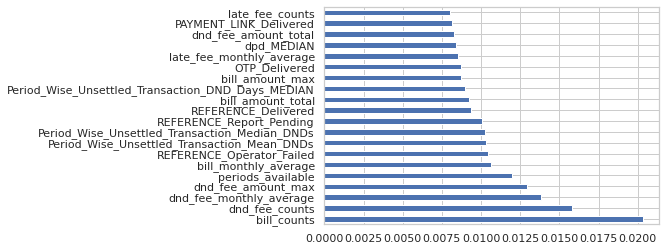

In [21]:
#Using ExtraTreeClassifier for feature selection
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [22]:
pip install statsmodels

In [23]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols

# Function Built for Statistical Test!
def statistical_test(df_check,target):
    feature_list = []
    unnecessary_features = []
    for i in df_check.columns: 
        g1 = df[df['Final_Risk']==0][i]
        g2 = df[df['Final_Risk']==1][i]
        g3 = df[df['Final_Risk']==2][i]
       
        ts,pv = stats.f_oneway(g1,g2,g3)
        
        if(pv<0.05):
            feature_list.append(i)
            print('{} :--> p_value::{} is Affecting Categorization'.format(i,pv))
        else:
            unnecessary_features.append(i)
            print('{} is NOT Affecting Categorization'.format(i))
    return feature_list,unnecessary_features

# final_feature based on Statistical Test
final_features,non_important_features = statistical_test(df.drop('Final_Risk',axis=1),df.Final_Risk)
final_features

user_id :--> p_value::0.0012432779222302408 is Affecting Categorization
product :--> p_value::0.006742099368491302 is Affecting Categorization
bill_counts :--> p_value::5.3183253082289406e-36 is Affecting Categorization
buy_gold_counts is NOT Affecting Categorization
cashback_counts :--> p_value::0.004594595311419299 is Affecting Categorization
charge_counts is NOT Affecting Categorization
convenience_fee_counts :--> p_value::0.0021831684572211026 is Affecting Categorization
dnd_fee_counts :--> p_value::3e-323 is Affecting Categorization
emi_counts :--> p_value::4.218883945235326e-15 is Affecting Categorization
emi_processing_fee_counts :--> p_value::1.3711462521191202e-13 is Affecting Categorization
giftcard_counts :--> p_value::0.000594733107679985 is Affecting Categorization
late_fee_counts :--> p_value::8.031138968584132e-96 is Affecting Categorization
nach_reverse_fee_counts is NOT Affecting Categorization
paytm_counts is NOT Affecting Categorization
qr_counts :--> p_value::0.0021

['user_id',
 'product',
 'bill_counts',
 'cashback_counts',
 'convenience_fee_counts',
 'dnd_fee_counts',
 'emi_counts',
 'emi_processing_fee_counts',
 'giftcard_counts',
 'late_fee_counts',
 'qr_counts',
 'sell_gold_counts',
 'utility_counts',
 'periods_available',
 'convenience_fee_amount_max',
 'dnd_fee_amount_max',
 'emi_amount_max',
 'emi_processing_fee_amount_max',
 'giftcard_amount_max',
 'late_fee_amount_max',
 'qr_amount_max',
 'sell_gold_amount_max',
 'bill_amount_total',
 'dnd_fee_amount_total',
 'emi_amount_total',
 'emi_processing_fee_amount_total',
 'giftcard_amount_total',
 'late_fee_amount_total',
 'sell_gold_amount_total',
 'utility_amount_total',
 'bill_monthly_average',
 'dnd_fee_monthly_average',
 'emi_monthly_average',
 'emi_processing_fee_monthly_average',
 'giftcard_monthly_average',
 'late_fee_monthly_average',
 'qr_monthly_average',
 'Payments_After_60_Days',
 'Payments_Early_Counts',
 'Payments_Within_15_Days',
 'Payments_Within_30_Days',
 'Payments_Within_45_

In [24]:

non_important_features


['buy_gold_counts',
 'charge_counts',
 'nach_reverse_fee_counts',
 'paytm_counts',
 'shopping_counts',
 'bill_amount_max',
 'buy_gold_amount_max',
 'cashback_amount_max',
 'charge_amount_max',
 'nach_reverse_fee_amount_max',
 'paytm_amount_max',
 'shopping_amount_max',
 'utility_amount_max',
 'buy_gold_amount_total',
 'cashback_amount_total',
 'charge_amount_total',
 'convenience_fee_amount_total',
 'nach_reverse_fee_amount_total',
 'paytm_amount_total',
 'qr_amount_total',
 'shopping_amount_total',
 'buy_gold_monthly_average',
 'cashback_monthly_average',
 'charge_monthly_average',
 'convenience_fee_monthly_average',
 'nach_reverse_fee_monthly_average',
 'paytm_monthly_average',
 'sell_gold_monthly_average',
 'shopping_monthly_average',
 'utility_monthly_average',
 'Transactions_1000+',
 'Transactions_700-1000',
 'CIBIL_OVERDUE_Delivered',
 'CIBIL_OVERDUE_Operator_Failed',
 'ISSUE_RESOLVED_Delivered',
 'OVERDUE_SETTLEMENT_Operator_Failed',
 'PAYMENT_LINK_Delivered',
 'REFERENCE_Not_Se

In [25]:
#dropping unnecessary columns
unnecessary = non_important_features

df.drop(unnecessary,axis=1,inplace=True)

In [26]:
df.shape


(14053, 135)

In [ ]:
list(df)

['user_id',
 'product',
 'bill_counts',
 'cashback_counts',
 'convenience_fee_counts',
 'dnd_fee_counts',
 'emi_counts',
 'emi_processing_fee_counts',
 'giftcard_counts',
 'late_fee_counts',
 'qr_counts',
 'sell_gold_counts',
 'utility_counts',
 'periods_available',
 'convenience_fee_amount_max',
 'dnd_fee_amount_max',
 'emi_amount_max',
 'emi_processing_fee_amount_max',
 'giftcard_amount_max',
 'late_fee_amount_max',
 'qr_amount_max',
 'sell_gold_amount_max',
 'bill_amount_total',
 'dnd_fee_amount_total',
 'emi_amount_total',
 'emi_processing_fee_amount_total',
 'giftcard_amount_total',
 'late_fee_amount_total',
 'sell_gold_amount_total',
 'utility_amount_total',
 'bill_monthly_average',
 'dnd_fee_monthly_average',
 'emi_monthly_average',
 'emi_processing_fee_monthly_average',
 'giftcard_monthly_average',
 'late_fee_monthly_average',
 'qr_monthly_average',
 'Payments_After_60_Days',
 'Payments_Early_Counts',
 'Payments_Within_15_Days',
 'Payments_Within_30_Days',
 'Payments_Within_45_

In [27]:
target_names = df['Final_Risk']

In [28]:
#separating dataset into X and y
X = df.drop(['Final_Risk','user_id'] , axis = 1)
y= df.Final_Risk

#Splitting the Dataset inro Train Set and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [29]:

print('Train data shape {} {}'.format(X_train.shape, y_train.shape))
print('Test data shape {} {}'.format(X_test.shape, y_test.shape))

Train data shape (11242, 133) (11242,)
Test data shape (2811, 133) (2811,)


[0.00197985 0.03246678 0.00317241 0.00775503 0.01862645 0.00656935
 0.00618069 0.00462086 0.01016361 0.0078284  0.00402629 0.00891412
 0.01898782 0.0069297  0.01442164 0.00704488 0.00725143 0.00435095
 0.00906198 0.00790762 0.00384864 0.01388598 0.00978052 0.00713239
 0.00662723 0.00421198 0.00850298 0.0039857  0.00907729 0.01550228
 0.01586017 0.0081507  0.00867816 0.00453277 0.01210788 0.00887874
 0.00412033 0.01126468 0.00793632 0.00727976 0.00636404 0.00449774
 0.00972014 0.01008697 0.00644202 0.00484173 0.01104985 0.01270875
 0.00404303 0.0078423  0.00642299 0.00711248 0.00908861 0.00636104
 0.00550682 0.00390184 0.01118908 0.01198518 0.00886772 0.00899293
 0.00207075 0.01157433 0.01341673 0.00799897 0.01037514 0.00734408
 0.00846269 0.01167803 0.01379757 0.01564087 0.01499379 0.00764125
 0.01006605 0.00393613 0.00719426 0.00938981 0.00645319 0.00535432
 0.00859003 0.00635945 0.01019338 0.00538763 0.00860626 0.00602397
 0.00455634 0.00527918 0.00599643 0.00621152 0.00894555 0.0048

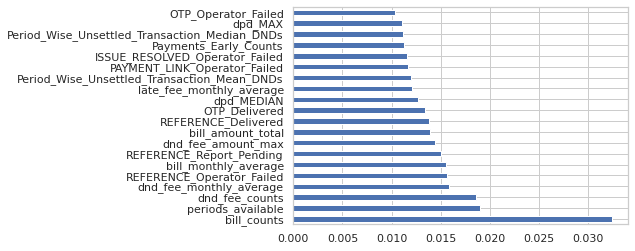

In [30]:
#Using ExtraTreeClassifier for feature selection
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [ ]:
#!pip install scikit-learn==0.22.2

In [32]:
pip install flaml

     |████████████████████████████████| 143 kB 6.3 MB/s 
     |████████████████████████████████| 2.0 MB 36.7 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [74]:
from flaml import AutoML
automl = AutoML()
automl.fit(X_train, y_train, task="classification", time_budget=50 ,metric='micro_f1')

[flaml.automl: 02-02 08:49:25] {2051} INFO - task = classification
[flaml.automl: 02-02 08:49:25] {2053} INFO - Data split method: stratified
[flaml.automl: 02-02 08:49:25] {2057} INFO - Evaluation method: holdout
[flaml.automl: 02-02 08:49:25] {2138} INFO - Minimizing error metric: 1-micro_f1
[flaml.automl: 02-02 08:49:25] {2196} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 02-02 08:49:25] {2449} INFO - iteration 0, current learner lgbm
[flaml.automl: 02-02 08:49:25] {2563} INFO - Estimated sufficient time budget=6883s. Estimated necessary time budget=159s.
[flaml.automl: 02-02 08:49:25] {2615} INFO -  at 1.4s,	estimator lgbm's best error=0.1757,	best estimator lgbm's best error=0.1757
[flaml.automl: 02-02 08:49:25] {2449} INFO - iteration 1, current learner lgbm
[flaml.automl: 02-02 08:49:26] {2615} INFO -  at 1.9s,	estimator lgbm's best error=0.1757,	best estimator lgbm's best error=0.1757
[flaml.automl: 0

In [75]:
print('Best Machine Learning Algorithm:', automl.best_estimator)
print('Best hyperparmeter configuration:', automl.best_config)

Best Machine Learning Algorithm: lgbm
Best hyperparmeter configuration: {'n_estimators': 66, 'num_leaves': 18, 'min_child_samples': 4, 'learning_rate': 0.15227584911763561, 'log_max_bin': 7, 'colsample_bytree': 0.7370891962100831, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.21498544744861117}


In [76]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier(**automl.best_config)
clf.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.7370891962100831,
               learning_rate=0.15227584911763561, log_max_bin=7,
               min_child_samples=4, n_estimators=66, num_leaves=18,
               reg_alpha=0.0009765625, reg_lambda=0.21498544744861117)

In [77]:
# predict the results
y_pred=clf.predict(X_test)

In [78]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


LightGBM Model accuracy score: 0.9082


In [79]:
y_pred_train = clf.predict(X_train)

In [80]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9628


In [81]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))


Training set score: 0.9628
Test set score: 0.9082


In [82]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)


Confusion matrix

 [[2250   58   10]
 [ 165  253    7]
 [  15    3   50]]


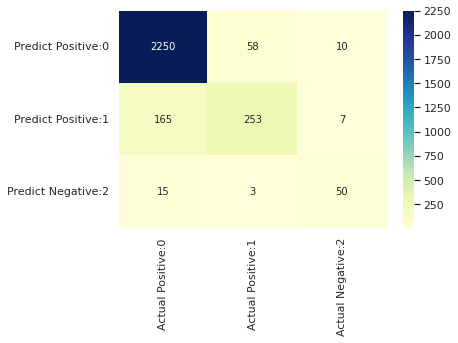

In [87]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:0','Actual Positive:1', 'Actual Negative:2'], 
                                 index=['Predict Positive:0','Predict Positive:1', 'Predict Negative:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [84]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2318
           1       0.81      0.60      0.68       425
           2       0.75      0.74      0.74        68

    accuracy                           0.91      2811
   macro avg       0.83      0.77      0.79      2811
weighted avg       0.90      0.91      0.90      2811



In [85]:
#installing shap package for EXPLAINING RF MODEL
!pip install shap

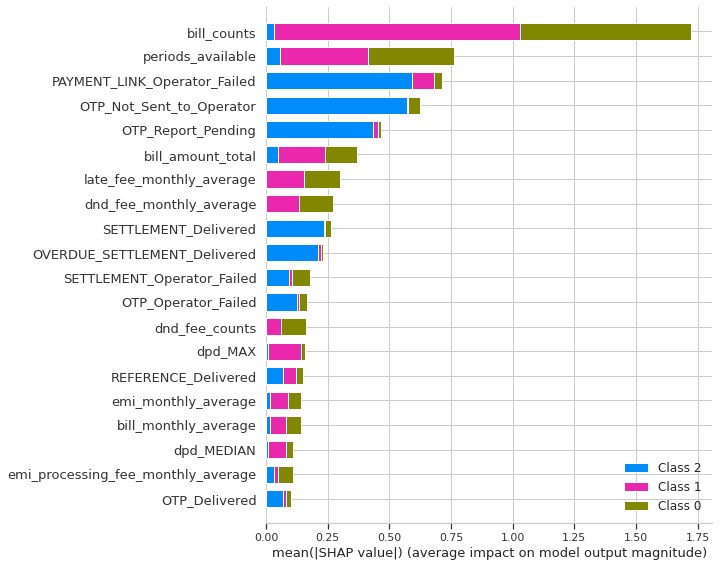

In [86]:
#implementing shap
import shap
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test,plot_type='bar')